In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("./archive/example.csv")
data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26547,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26548,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26549,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26550,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26552 non-null  object 
 1   GAME_ID           26552 non-null  int64  
 2   GAME_STATUS_TEXT  26552 non-null  object 
 3   HOME_TEAM_ID      26552 non-null  int64  
 4   VISITOR_TEAM_ID   26552 non-null  int64  
 5   SEASON            26552 non-null  int64  
 6   TEAM_ID_home      26552 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26552 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [4]:
# 데이터 정렬
data1=data.sort_values(['GAME_DATE_EST','GAME_ID']).sort_values('GAME_DATE_EST',ascending=False)

In [5]:
# 필요없는 컬럼 제거
# - GAME_STATUS_TEXT: 값 일정,
data2=data1.drop(['GAME_STATUS_TEXT','HOME_TEAM_ID','VISITOR_TEAM_ID'],axis=1)

#### 테스트 시작

In [7]:
data2[(data2['TEAM_ID_home']==1610612762)&(data2['TEAM_ID_away']==1610612742)]

,GAME_DATE_EST,GAME_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
483,2022-10-14,12200068,2022,1610612762,101.0,0.451,0.765,0.231,25.0,52.0,1610612742,115.0,0.447,0.667,0.362,28.0,36.0,0
589,2022-04-28,42100176,2021,1610612762,96.0,0.429,0.750,0.257,20.0,48.0,1610612742,98.0,0.450,0.818,0.395,22.0,37.0,0
603,2022-04-23,42100174,2021,1610612762,100.0,0.405,0.619,0.286,17.0,46.0,1610612742,99.0,0.429,0.783,0.341,15.0,43.0,1
610,2022-04-21,42100173,2021,1610612762,118.0,0.565,0.939,0.321,20.0,32.0,1610612742,126.0,0.494,0.839,0.429,24.0,32.0,0
973,2022-02-25,22100903,2021,1610612762,114.0,0.541,0.818,0.421,22.0,44.0,1610612742,109.0,0.477,1.000,0.436,22.0,30.0,1
1386,2021-12-25,22100492,2021,1610612762,120.0,0.444,0.757,0.333,24.0,49.0,1610612742,116.0,0.427,0.857,0.333,19.0,43.0,1
2913,2021-01-29,22000297,2020,1610612762,120.0,0.437,0.923,0.417,21.0,56.0,1610612742,101.0,0.430,0.667,0.273,20.0,40.0,1
2928,2021-01-27,22000282,2020,1610612762,116.0,0.462,0.762,0.390,20.0,50.0,1610612742,104.0,0.462,0.889,0.343,22.0,36.0,1
3287,2020-08-10,21901293,2019,1610612762,114.0,0.476,0.750,0.457,28.0,38.0,1610612742,122.0,0.565,0.875,0.500,29.0,34.0,0
3672,2020-01-25,21900680,2019,1610612762,112.0,0.440,0.773,0.349,22.0,54.0,1610612742,107.0,0.433,0.538,0.390,19.0,44.0,1


In [8]:
data2[(data2['TEAM_ID_home']==1610612742)&(data2['TEAM_ID_away']==1610612762)]

,GAME_DATE_EST,GAME_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
368,2022-11-02,22200115,2022,1610612742,103.0,0.500,0.533,0.289,20.0,37.0,1610612762,100.0,0.464,0.857,0.333,28.0,40.0,1
597,2022-04-25,42100175,2021,1610612742,102.0,0.435,0.762,0.279,16.0,49.0,1610612762,77.0,0.377,0.762,0.100,12.0,40.0,1
619,2022-04-18,42100172,2021,1610612742,110.0,0.470,0.769,0.468,22.0,31.0,1610612762,104.0,0.463,0.850,0.379,19.0,50.0,1
625,2022-04-16,42100171,2021,1610612742,93.0,0.382,0.765,0.281,17.0,34.0,1610612762,99.0,0.434,0.870,0.318,15.0,53.0,0
751,2022-03-27,22101121,2021,1610612742,114.0,0.519,0.708,0.500,21.0,45.0,1610612762,100.0,0.461,0.600,0.353,23.0,36.0,1
896,2022-03-07,22100972,2021,1610612742,111.0,0.443,0.800,0.370,19.0,43.0,1610612762,103.0,0.434,0.792,0.387,22.0,45.0,1
1914,2021-10-06,12100018,2021,1610612742,111.0,0.473,0.700,0.367,25.0,54.0,1610612762,101.0,0.415,0.636,0.308,26.0,40.0,1
2360,2021-04-05,22000764,2020,1610612742,111.0,0.451,0.750,0.469,22.0,44.0,1610612762,103.0,0.420,0.773,0.273,20.0,48.0,1
3561,2020-02-10,21900798,2019,1610612742,119.0,0.470,0.839,0.349,24.0,26.0,1610612762,123.0,0.590,0.762,0.429,27.0,45.0,0
20661,2018-11-14,21800210,2018,1610612742,118.0,0.584,0.667,0.429,24.0,51.0,1610612762,68.0,0.309,0.632,0.171,16.0,33.0,1


In [9]:
# for i in range(10):
    
# if df1[date_est] > df2[date_est]:
#     df0=pd.concat(df0,df1[data_est])
# elif df1[date_est] < df2[date_est]:
#     df0=pd.concat(df0,df2[data_est])

# df_date=pd.concat(df1[data_est10개값],df2[date_est10개값])
# df_date.sort_values(ascending=False)
# for date in df_date:
#     if date in df1[data_est10개값]:
#         pd.concat(df0,df1[df1[data_est10개값]==date])
#     elif date in df2[data_est10개값]:
#         pd.concat(df0,df2[df2[data_est10개값]==date])

df1=data2[(data2['TEAM_ID_home']==1610612762)&(data2['TEAM_ID_away']==1610612742)]
df2=data2[(data2['TEAM_ID_away']==1610612762)&(data2['TEAM_ID_home']==1610612742)]
df_date=pd.concat([df1['GAME_DATE_EST'],df2['GAME_DATE_EST']]).sort_index(ascending=True)
df_date
# df=pd.DataFrame({'HT_ID':[],'AT_ID':[],'HTW':[]})
df=pd.DataFrame({'GAME_DATE_EST':[],'HT_ID':[],'AT_ID':[],'FG_PCT_H':[],'FG_PCT_A':[],'FT_PCT_H':[],'FT_PCT_A':[],
                 'HT_W':[]})
cnt=0
for date in df_date:
    if date in df1['GAME_DATE_EST'].values:
        df1_=df1[df1['GAME_DATE_EST']==date]
        new = {'GAME_DATE_EST':date,'HT_ID':df1_['TEAM_ID_home'].values[0],'AT_ID':df1_['TEAM_ID_away'].values[0],
               'FG_PCT_H':df1_['FG_PCT_home'].values[0],'FG_PCT_A':df1_['FG_PCT_away'].values[0],
               'FT_PCT_H':df1_['FT_PCT_home'].values[0],'FT_PCT_A':df1_['FT_PCT_away'].values[0],
               'HT_W':df1_['HOME_TEAM_WINS'].values[0]}
        df=pd.concat([df,pd.DataFrame([new])], ignore_index=True)
    elif date in df2['GAME_DATE_EST'].values:
        df2_=df2[df2['GAME_DATE_EST']==date]
        new = {'GAME_DATE_EST':date,'HT_ID':df2_['TEAM_ID_away'].values[0],'AT_ID':df2_['TEAM_ID_home'].values[0],
               'FG_PCT_H':df2_['FG_PCT_away'].values[0],'FG_PCT_A':df2_['FG_PCT_home'].values[0],
               'FT_PCT_H':df2_['FT_PCT_away'].values[0],'FT_PCT_A':df2_['FT_PCT_home'].values[0],
               'HT_W':0}
        df=pd.concat([df,pd.DataFrame([new])], ignore_index=True)
    cnt+=1
    if cnt>=10:
        break
df

,GAME_DATE_EST,HT_ID,AT_ID,FG_PCT_H,FG_PCT_A,FT_PCT_H,FT_PCT_A,HT_W
0,2022-11-02,1.610613e+09,1.610613e+09,0.464,0.500,0.857,0.533,0.0
1,2022-10-14,1.610613e+09,1.610613e+09,0.451,0.447,0.765,0.667,0.0
2,2022-04-28,1.610613e+09,1.610613e+09,0.429,0.450,0.750,0.818,0.0
3,2022-04-25,1.610613e+09,1.610613e+09,0.377,0.435,0.762,0.762,0.0
4,2022-04-23,1.610613e+09,1.610613e+09,0.405,0.429,0.619,0.783,1.0
5,2022-04-21,1.610613e+09,1.610613e+09,0.565,0.494,0.939,0.839,0.0
6,2022-04-18,1.610613e+09,1.610613e+09,0.463,0.470,0.850,0.769,0.0
7,2022-04-16,1.610613e+09,1.610613e+09,0.434,0.382,0.870,0.765,0.0
8,2022-03-27,1.610613e+09,1.610613e+09,0.461,0.519,0.600,0.708,0.0
9,2022-03-07,1.610613e+09,1.610613e+09,0.434,0.443,0.792,0.800,0.0


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier # knn 분류 모델

In [11]:
# 문제와 답 (열 분리)
X = df[['FG_PCT_H','FG_PCT_A','FG_PCT_H','FG_PCT_A']]
y = df['HT_W']

In [12]:
# 훈련셋과 테스트셋 분리 (행 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 4)
(3, 4)
(7,)
(3,)


In [13]:
# 모델 객체 생성 (+ 하이퍼 파라미터 설정)
knn_model = KNeighborsClassifier(n_neighbors=5)
# 모델 학습
knn_model.fit(X_train,y_train)
# 모델 예측
knn_model.score(X_test,y_test)


0.6666666666666666

#### 최적의 하이퍼 파라미터 찾기

In [15]:
K_lst = []
for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result = cross_val_score(knn_model, X_train, y_train, cv=5)
    print(f'{k}:', knn_result, knn_result.mean())
    K_lst.append(knn_result.mean())
print(f"가장 좋은 n_neighbors {K_lst.index(max(K_lst))+1}")

1: [1. 1. 1. 1. 1.] 1.0
2: [1. 1. 1. 1. 1.] 1.0
3: [1. 1. 1. 1. 1.] 1.0
4: [1. 1. 1. 1. 1.] 1.0
5: [1. 1. 1. 1. 1.] 1.0
6: [nan nan  1.  1.  1.] nan
7: [nan nan nan nan nan] nan
8: [nan nan nan nan nan] nan
9: [nan nan nan nan nan] nan
가장 좋은 n_neighbors 1


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 271, in predict
    neigh_in

In [16]:
K_lst = []
for k in range(1,6):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result = cross_val_score(knn_model, X_train, y_train, cv=5)
    print(f'{k}:', knn_result, knn_result.mean())
    K_lst.append(knn_result.mean())
print(f"가장 좋은 n_neighbors {K_lst.index(max(K_lst))+1}")

1: [1. 1. 1. 1. 1.] 1.0
2: [1. 1. 1. 1. 1.] 1.0
3: [1. 1. 1. 1. 1.] 1.0
4: [1. 1. 1. 1. 1.] 1.0
5: [1. 1. 1. 1. 1.] 1.0
가장 좋은 n_neighbors 1


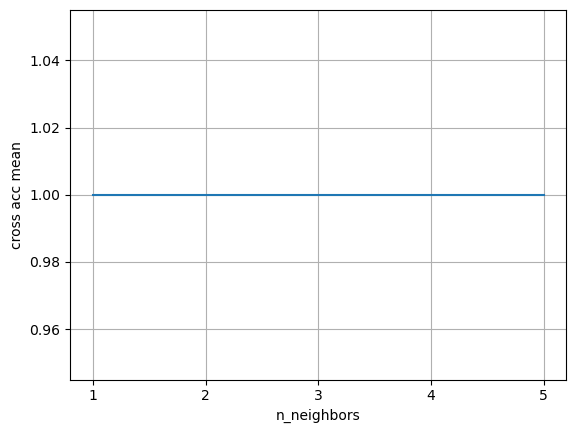

In [17]:
# 시각화
# 추이 - 선그래프
plt.plot(range(1,6), K_lst)
plt.xlabel('n_neighbors')
plt.xticks(range(1,6,1))
plt.ylabel('cross acc mean')
plt.grid()
# plt.xlim(600,800)
# plt.ylim(0.687,0.692)
plt.show()

(7, 4)
(3, 4)
(7,)
(3,)
0.6666666666666666
1: [1.  1.  0.5] 0.8333333333333334
2: [0.66666667 0.5        0.5       ] 0.5555555555555555
3: [1.  1.  0.5] 0.8333333333333334
4: [0.33333333 0.5        0.5       ] 0.4444444444444444
가장 좋은 n_neighbors 1


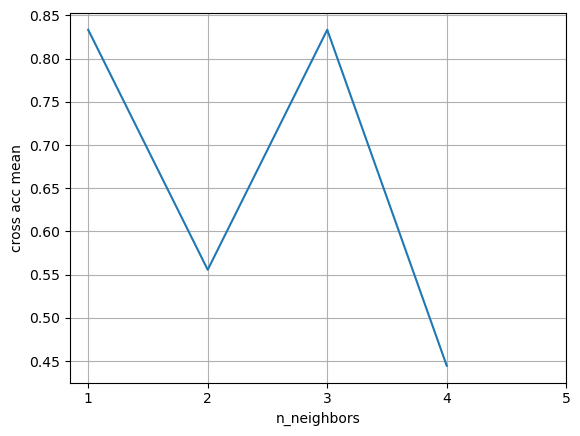

In [38]:
df1=data2[(data2['TEAM_ID_home']==1610612759)&(data2['TEAM_ID_away']==1610612764)]
df2=data2[(data2['TEAM_ID_away']==1610612759)&(data2['TEAM_ID_home']==1610612764)]
df_date=pd.concat([df1['GAME_DATE_EST'],df2['GAME_DATE_EST']]).sort_index(ascending=True)
df_date

df=pd.DataFrame({'GAME_DATE_EST':[],'HT_ID':[],'AT_ID':[],'FG_PCT_H':[],'FG_PCT_A':[],'FT_PCT_H':[],'FT_PCT_A':[],
                 'HT_W':[]})
cnt=0
for date in df_date:
    if date in df1['GAME_DATE_EST'].values:
        df1_=df1[df1['GAME_DATE_EST']==date]
        new = {'GAME_DATE_EST':date,'HT_ID':df1_['TEAM_ID_home'].values[0],'AT_ID':df1_['TEAM_ID_away'].values[0],
               'FG_PCT_H':df1_['FG_PCT_home'].values[0],'FG_PCT_A':df1_['FG_PCT_away'].values[0],
               'FT_PCT_H':df1_['FT_PCT_home'].values[0],'FT_PCT_A':df1_['FT_PCT_away'].values[0],
               'HT_W':df1_['HOME_TEAM_WINS'].values[0]}
        df=pd.concat([df,pd.DataFrame([new])], ignore_index=True)
    elif date in df2['GAME_DATE_EST'].values:
        df2_=df2[df2['GAME_DATE_EST']==date]
        new = {'GAME_DATE_EST':date,'HT_ID':df2_['TEAM_ID_away'].values[0],'AT_ID':df2_['TEAM_ID_home'].values[0],
               'FG_PCT_H':df2_['FG_PCT_away'].values[0],'FG_PCT_A':df2_['FG_PCT_home'].values[0],
               'FT_PCT_H':df2_['FT_PCT_away'].values[0],'FT_PCT_A':df2_['FT_PCT_home'].values[0],
               'HT_W':0}
        df=pd.concat([df,pd.DataFrame([new])], ignore_index=True)
    cnt+=1
    if cnt>=10:
        break
df

# 문제와 답 (열 분리)
X = df[['FG_PCT_H','FG_PCT_A','FG_PCT_H','FG_PCT_A']]
y = df['HT_W']
# 훈련셋과 테스트셋 분리 (행 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# 모델 객체 생성 (+ 하이퍼 파라미터 설정)
knn_model = KNeighborsClassifier(n_neighbors=5)
# 모델 학습
knn_model.fit(X_train,y_train)
# 모델 예측
print(knn_model.score(X_test,y_test))

# 최적의 파라미터 찾기
K_lst = []
for k in range(1,5):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result = cross_val_score(knn_model, X_train, y_train, cv=3)#에러 때문에 
    print(f'{k}:', knn_result, knn_result.mean())
    K_lst.append(knn_result.mean())
print(f"가장 좋은 n_neighbors {K_lst.index(max(K_lst))+1}")
# 시각화
# 추이 - 선그래프
plt.plot(range(1,5), K_lst)
plt.xlabel('n_neighbors')
plt.xticks(range(1,6,1))
plt.ylabel('cross acc mean')
plt.grid()
# plt.xlim(600,800)
# plt.ylim(0.687,0.692)
plt.show()